# Data Import, Structuring And Cleaning

T

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes = pd.read_csv("/kaggle/input/usa-los-angeles-crimes-data-2020-to-2023/Crime_Data_from_2020_to_Present.csv")

In [3]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

The time of crime occurence, TIME OCC column, seems to be wrongly structured, we will need to restructure so that we can extract some information. First, we may have to view a number of the values in this column so that we can get an idea of what may be wrong.

In [5]:
crimes["TIME OCC"].head(50)

0     2230
1      330
2     1200
3     1730
4      415
5       30
6     1315
7       40
8      200
9     1925
10    2200
11     955
12    1355
13    1638
14    1805
15     730
16    2018
17    1900
18    1200
19    1330
20    1735
21    1730
22    1445
23       1
24     700
25    1200
26    1830
27    2000
28    2000
29     400
30     600
31     100
32    2020
33    2000
34    1500
35    1200
36     811
37    1255
38    2100
39    1000
40    1930
41      55
42    2040
43     920
44    1645
45    1700
46    1135
47     420
48     115
49    1600
Name: TIME OCC, dtype: int64

In the first 50 values, we can conclude that the leading zeros are missing. This is a normal occurrence when entering data into an Excel sheet; the leading zeros are ignored unless you enter an apostrophe before the zero or set the column to text format.

We can observe that in row 2, the time is 330, but it should be 0330 hours. The case is even worse for midnight; i.e., rows 6, 8, and 24 should be 0030, 0040, and 0001 hrs, respectively.

Let's deal with this column by creating a function that adds three leading zeros if the length of a value is one, two if the length is two, and one if the length is three characters. For example:
- If the time is 1, the output is 0001.
- If it is 30, then 0030 is returned.
- If it is 330, then 0330 is returned.


In [6]:
crimes['TIME OCC'] = crimes['TIME OCC'].astype(str)

In [7]:
def add_leading_and_trailing_zeros(time):
    if len(time) == 1:
        return '000' + time
    elif len(time) == 2:
        return '00' + time
    elif len(time) == 3:
        return '0' + time
    else:
        return time

crimes["TIME OCC"] = crimes["TIME OCC"].apply(add_leading_and_trailing_zeros)

Anything more than 4 characters in the time column is an error and from the cell below, we can see that there is no time error

In [8]:
time_error = crimes[crimes['TIME OCC'].str.len() > 4]
time_error

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


In [9]:
crimes["Date Rptd"] = pd.to_datetime(crimes["Date Rptd"], infer_datetime_format='True')
crimes["DATE OCC"] = pd.to_datetime(crimes["DATE OCC"], infer_datetime_format='True')

/tmp/ipykernel_20/1533716271.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  crimes["Date Rptd"] = pd.to_datetime(crimes["Date Rptd"], infer_datetime_format='True')
/tmp/ipykernel_20/1533716271.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes["Date Rptd"] = pd.to_datetime(crimes["Date Rptd"], infer_datetime_format='True')
/tmp/ipykernel_20/1533716271.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cri

In [10]:
crimes[["Date Rptd", "DATE OCC"]].head()

,Date Rptd,DATE OCC
0,2020-01-08,2020-01-08
1,2020-01-02,2020-01-01
2,2020-04-14,2020-02-13
3,2020-01-01,2020-01-01
4,2020-01-01,2020-01-01


We can do a lot more if the time of occurence and date of occerence are in the same column, for example we can only extract date, month, year and many more.

We will combine these into a seperate column, DATETIME OCC.

In [11]:
crimes["DATE OCC"] = crimes["DATE OCC"].astype(str)

In [12]:
crimes["DATETIME OCC"] = crimes["DATE OCC"] + " " + crimes["TIME OCC"]

In [13]:
crimes["DATETIME OCC"] = pd.to_datetime(crimes["DATETIME OCC"])

Now, let us extract the values we had stated above into seperate columns.
* Year OCC will have the year crime occured
* Month OCC will have the month crime occured
* Month Name OCC will have the name of month the crime occured
* WDay OCC will have the day of week the crime occured
* Hour OCC the hour crime occured

In [14]:
crimes["Year OCC"] = crimes["DATETIME OCC"].dt.year 
crimes["Month OCC"] = crimes["DATETIME OCC"].dt.month
crimes["Month Name OCC"] = crimes["DATETIME OCC"].dt.strftime("%b")
crimes["WDay OCC"] = crimes["DATETIME OCC"].dt.strftime("%a")
crimes["Hour OCC"] = crimes["DATETIME OCC"].dt.hour

In [15]:
crimes[["Date Rptd", "DATE OCC", "TIME OCC", "DATETIME OCC", 
        "Year OCC", "Month OCC", "Month Name OCC", "WDay OCC", "Hour OCC"]].head()

,Date Rptd,DATE OCC,TIME OCC,DATETIME OCC,Year OCC,Month OCC,Month Name OCC,WDay OCC,Hour OCC
0,2020-01-08,2020-01-08,2230,2020-01-08 22:30:00,2020,1,Jan,Wed,22
1,2020-01-02,2020-01-01,0330,2020-01-01 03:30:00,2020,1,Jan,Wed,3
2,2020-04-14,2020-02-13,1200,2020-02-13 12:00:00,2020,2,Feb,Thu,12
3,2020-01-01,2020-01-01,1730,2020-01-01 17:30:00,2020,1,Jan,Wed,17
4,2020-01-01,2020-01-01,0415,2020-01-01 04:15:00,2020,1,Jan,Wed,4


There are a number of columns we will not need in this analysis, let's get rid of them

In [16]:
cols_to_drop = ["DR_NO", "DATE OCC", "TIME OCC", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Cross Street"]
crimes = crimes.drop(cols_to_drop, axis=1)

At some point, we may have to analyse the crimes against each gender category. The Vict Sex column is abbreviated, let's us have them in full for easy comprehension.

In [17]:
crimes["Vict Sex"].value_counts()

Vict Sex
M    342350
F    305479
X     72559
H        90
-         1
Name: count, dtype: int64

In [18]:
crimes["Vict Sex"] = crimes["Vict Sex"].astype(str)
crimes["Vict Sex"].value_counts()

Vict Sex
M      342350
F      305479
nan    109299
X       72559
H          90
-           1
Name: count, dtype: int64

After converting the 'Vict Sex' column to string format, the rows which had no sex of the victim were labeled as not a number (NAN).

We will define a function to replace:
- 'F' with 'female'
- 'M' with 'male'
- 'X' with 'unspecified gender'
- any other abbreviation, including NANs, as 'unknown'

In [19]:
def replace_gender_abb(abb):
    if abb == "F":
        return "Female"
    elif abb == "M":
        return "Male"
    elif abb == "X":
        return "Unspecified"
    else:
        return "Unknown"

In [20]:
crimes["Vict Sex"] = crimes["Vict Sex"].apply(replace_gender_abb)

We may also have to put weapons used into their broader categories rather than specific, for example Revolver, Shotgun, Hand gun etc, into Firearm category.

In [21]:
crimes["Weapon Used Cd"].value_counts()

Weapon Used Cd
400.0    155040
500.0     30760
511.0     21201
102.0     17903
109.0      6516
          ...  
120.0         3
119.0         2
123.0         1
121.0         1
124.0         1
Name: count, Length: 79, dtype: int64

There are upto 79 types of weapons used.

We will make use of their codes e.g code 100 to 125 to one category, Firearm

In [22]:
print(crimes.groupby(["Weapon Used Cd", "Weapon Desc"]).size().head(40))
print(crimes.groupby(["Weapon Used Cd", "Weapon Desc"]).size().tail(40))

Weapon Used Cd  Weapon Desc                                  
101.0           REVOLVER                                          1078
102.0           HAND GUN                                         17903
103.0           RIFLE                                              446
104.0           SHOTGUN                                            281
105.0           SAWED OFF RIFLE/SHOTGUN                             27
106.0           UNKNOWN FIREARM                                   5881
107.0           OTHER FIREARM                                      839
108.0           AUTOMATIC WEAPON/SUB-MACHINE GUN                    25
109.0           SEMI-AUTOMATIC PISTOL                             6516
110.0           SEMI-AUTOMATIC RIFLE                                46
111.0           STARTER PISTOL/REVOLVER                             37
112.0           TOY GUN                                            146
113.0           SIMULATED GUN                                     1092
114.0          

In [23]:
def weapon_category(code):
    if 100 <= code <= 125:
        return "Firearm"
    elif 200 <= code <= 223:
        return "Sharp Object"
    elif 300 <= code <= 312:
        return "Blunt Object"
    elif code == 400:
        return "Strong Arms"
    elif 500 <= code <= 516:
        return "Other Weapon"
    else:
        return "Null"

crimes["Weapon Used Category"] = crimes["Weapon Used Cd"].apply(weapon_category)

In [24]:
crimes["Weapon Used Category"].value_counts()

Weapon Used Category
Null            540459
Strong Arms     155040
Other Weapon     57982
Firearm          36205
Sharp Object     23999
Blunt Object     16093
Name: count, dtype: int64

The Null category represents the rows which had no value in the **Weapon Used Cd** column.

The number adds up as from the info of this data, there are 829778 rows and rows which has data of weapon used are 289319 hence the remainder is 540459 which are now represented as Null in our **Weapon Used Category** column

In [25]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date Rptd             829778 non-null  datetime64[ns]
 1   AREA                  829778 non-null  int64         
 2   AREA NAME             829778 non-null  object        
 3   Rpt Dist No           829778 non-null  int64         
 4   Part 1-2              829778 non-null  int64         
 5   Crm Cd                829778 non-null  int64         
 6   Crm Cd Desc           829778 non-null  object        
 7   Mocodes               714922 non-null  object        
 8   Vict Age              829778 non-null  int64         
 9   Vict Sex              829778 non-null  object        
 10  Vict Descent          720471 non-null  object        
 11  Premis Cd             829768 non-null  float64       
 12  Premis Desc           829286 non-null  object        
 13 

# Analysis

# Crimes Versus Time

## Annual Crimes

In [26]:
earliest_time = crimes["DATETIME OCC"].min()
latest_time = crimes["DATETIME OCC"].max()

print("Earliest Time:", earliest_time)
print("Latest Time:", latest_time)

Earliest Time: 2020-01-01 00:01:00
Latest Time: 2023-10-30 23:50:00


In most of our analysis, we will not include the year 2023 since we have data upto october, i.e 2023-10-30 23:50:00 so we will introduce **crimes_excl_2023** dataframe to have all years except 2023

In [27]:
crimes_excl_2023 = crimes[crimes["Year OCC"] !=2023]

In [28]:
yrly_crimes = crimes_excl_2023["Year OCC"].value_counts().reset_index()
yrly_crimes.columns = ["Year OCC", "Number Of Crimes"]
yrly_crimes

,Year OCC,Number Of Crimes
0,2022,234289
1,2021,209380
2,2020,199426


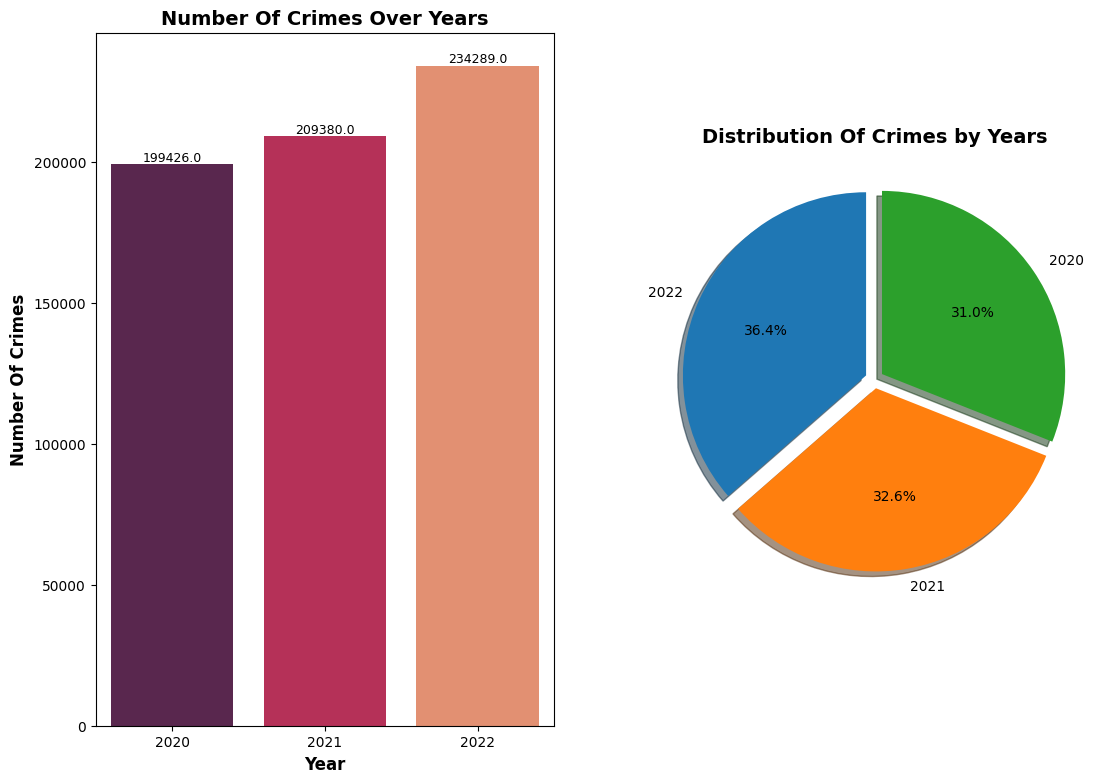

In [29]:
figure, axes = plt.subplots(1, 2, figsize=(13,9))

# Creating bar graph
barplot = sns.barplot(data=yrly_crimes, x="Year OCC", y="Number Of Crimes", ax=axes[0], palette="rocket")
axes[0].set_xlabel("Year", fontweight="bold", fontsize=12)
axes[0].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[0].set_title("Number Of Crimes Over Years", fontweight="bold", fontsize=14)

# Setting bar labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom", fontsize=9)

#Creating pie chart
sizes1 = yrly_crimes["Number Of Crimes"]
labels1 = yrly_crimes["Year OCC"]

explode = [0.05, 0.05, 0.05]
axes[1].pie(sizes1, labels=labels1, autopct="%1.1f%%", startangle=90, explode=explode, shadow=True)
axes[1].set_title("Distribution Of Crimes by Years", fontweight="bold", fontsize=14)

plt.show()

We can make an observation that as the years go by, the number of crimes seems to increase with the highest year being 2022

### Will there be even be a further rise of crimes in 2023?
Before we answer this, we will first include 2023 then compare it with other years

In [30]:
yrly_crimes_incl2023 = crimes["Year OCC"].value_counts().reset_index()
yrly_crimes_incl2023.columns = ["Year OCC", "Number Of Crimes"]
yrly_crimes_incl2023

,Year OCC,Number Of Crimes
0,2022,234289
1,2021,209380
2,2020,199426
3,2023,186683


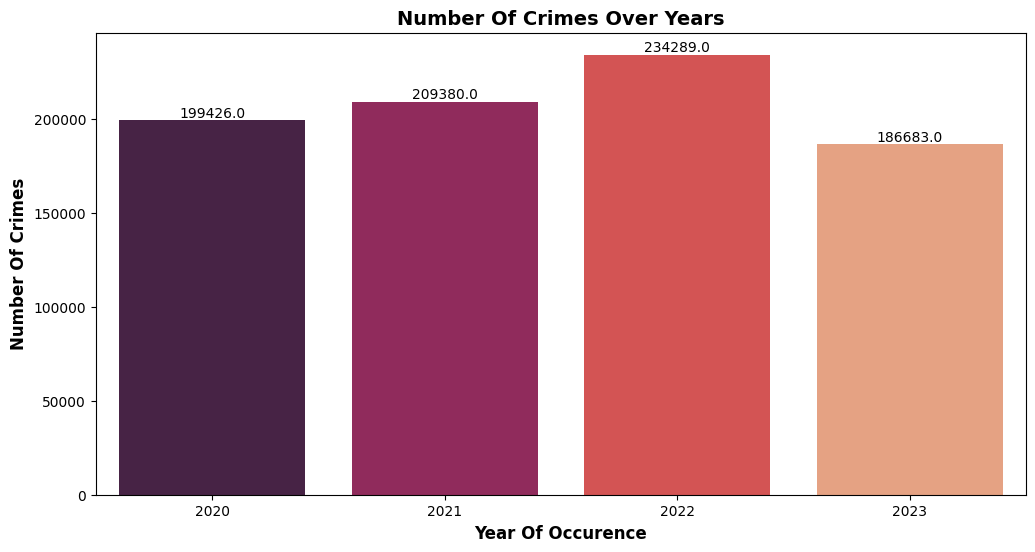

In [31]:
plt.figure(figsize=(12, 6))

barplot = sns.barplot(data=yrly_crimes_incl2023, x="Year OCC", y="Number Of Crimes", palette="rocket")
plt.xlabel("Year Of Occurence", fontweight="bold", fontsize=12)
plt.ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.title("Number Of Crimes Over Years", fontweight="bold", fontsize=14)

for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")
plt.show()

We had noted that we do not have data for the two months of 2023, November and December, as the latest date was 2023-10-30 23:50:00.

Despite this, from the above visualization, the year has recorded about 12,800 crimes less than the lowest year, 2020. It is also approximately 47,700 crimes lower from the highest of all time, 2022, in total crimes.


## Monthly Crimes

In [32]:
mnthly_crimes = crimes_excl_2023.groupby(["Month Name OCC"]).size().reset_index(name="Number Of Crimes")
print(mnthly_crimes.head())

print("\n")

yrly_mnthly_crimes = crimes_excl_2023.groupby(["Year OCC", "Month Name OCC"]).size().reset_index(name="Number Of Crimes")
print(yrly_mnthly_crimes.head())

  Month Name OCC  Number Of Crimes
0            Apr             51513
1            Aug             55314
2            Dec             53760
3            Feb             50355
4            Jan             53469


   Year OCC Month Name OCC  Number Of Crimes
0      2020            Apr             15678
1      2020            Aug             16872
2      2020            Dec             15941
3      2020            Feb             17252
4      2020            Jan             18487


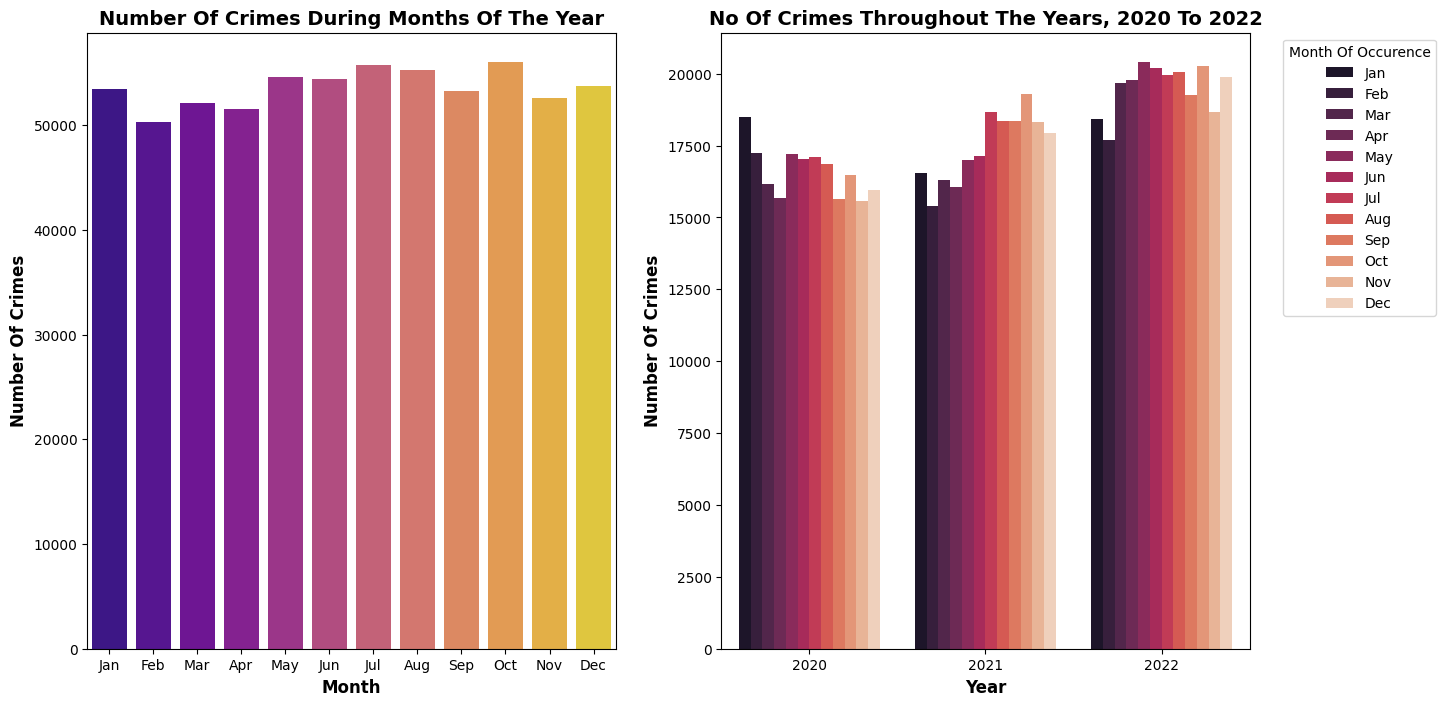

In [33]:
figure, axes=plt.subplots(1, 2, figsize=(15, 8))

# Order of months
mnths_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
mnthly_crimes["Month Name OCC"] = pd.Categorical(mnthly_crimes["Month Name OCC"], categories=mnths_order, ordered=True)

# First bar plot creation
sns.barplot(data=mnthly_crimes, x="Month Name OCC", y="Number Of Crimes", palette="plasma", ax=axes[0])
axes[0].set_xlabel("Month", fontweight="bold", fontsize=12)
axes[0].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[0].set_title("Number Of Crimes During Months Of The Year", fontweight="bold", fontsize=14)

# Order of months
yrly_mnthly_crimes["Month Name OCC"] = pd.Categorical(yrly_mnthly_crimes["Month Name OCC"], categories=mnths_order, ordered=True)

# Second bar plot creation
sns.barplot(data=yrly_mnthly_crimes, x="Year OCC", y="Number Of Crimes", hue="Month Name OCC", palette="rocket", ax=axes[1])
axes[1].set_xlabel("Year", fontweight="bold", fontsize=12)
axes[1].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[1].set_title("No Of Crimes Throughout The Years, 2020 To 2022", fontweight="bold", fontsize=14)
axes[1].legend(title="Month Of Occurence", bbox_to_anchor=(1.05,1), loc="upper left")

plt.show()

## Weekly Crimes
### Is there a day of the week that has higher or lower no crimes than the other? Let's find out

In [34]:
weekly_crimes = crimes_excl_2023.groupby(["WDay OCC"]).size().reset_index(name="Number Of Crimes")
weekly_crimes

,WDay OCC,Number Of Crimes
0,Fri,98249
1,Mon,90945
2,Sat,94328
3,Sun,89221
4,Thu,90689
5,Tue,88303
6,Wed,91360


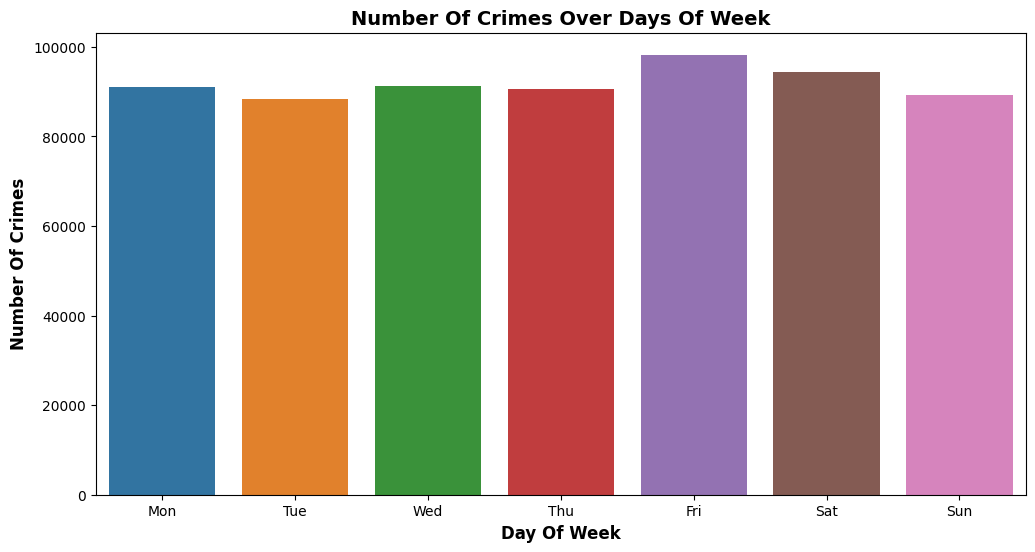

In [35]:
plt.figure(figsize=(12, 6))

# Order of days of week
wday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
weekly_crimes["WDay OCC"] = pd.Categorical(weekly_crimes["WDay OCC"], categories=wday_order, ordered=True)

# Bar plot creation
sns.barplot(data=weekly_crimes, x="WDay OCC", y="Number Of Crimes")
plt.xlabel("Day Of Week", fontweight="bold", fontsize=12)
plt.ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.title("Number Of Crimes Over Days Of Week", fontweight="bold", fontsize=14)

plt.show()

From the visualization above, we can notice that there are almost equal distributions of crimes over various days of the week. Fridays however records a slightly higher number of crimes than other days.

In [36]:
yrly_weekly_crimes = crimes_excl_2023.groupby(["Year OCC", "WDay OCC"]).size().reset_index(name="Number Of Crimes")
yrly_weekly_crimes.head()

,Year OCC,WDay OCC,Number Of Crimes
0,2020,Fri,29889
1,2020,Mon,28264
2,2020,Sat,28908
3,2020,Sun,27609
4,2020,Thu,28230


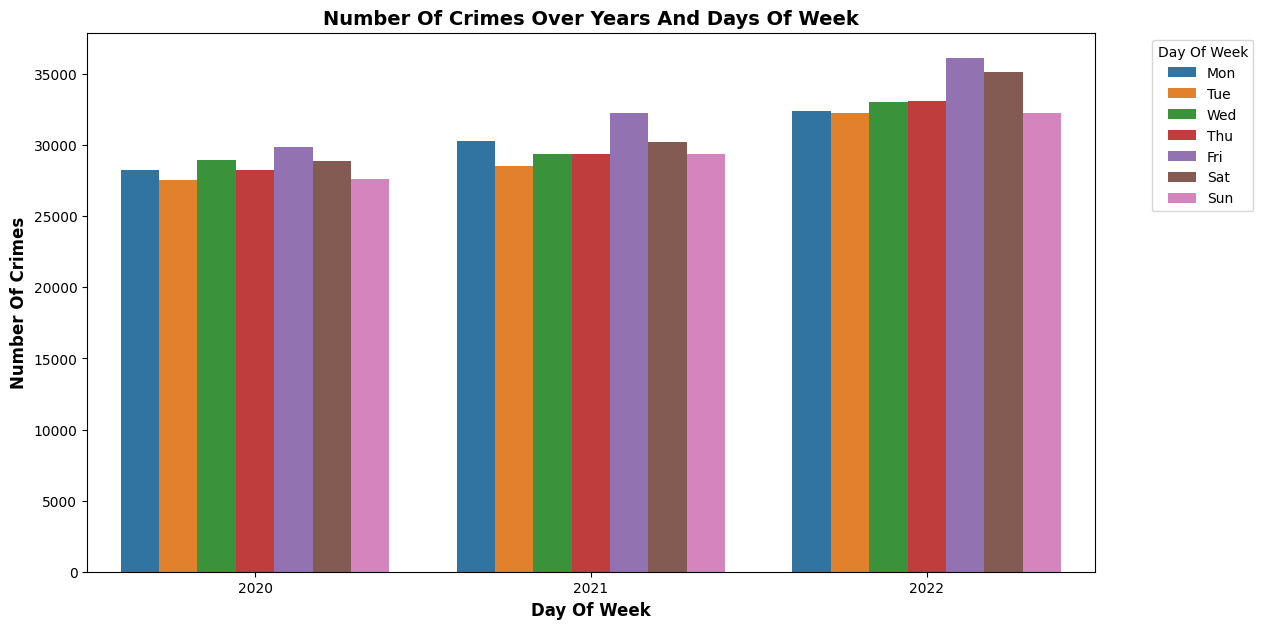

In [37]:
plt.figure(figsize=(13,7))

yrly_weekly_crimes["WDay OCC"] = pd.Categorical(yrly_weekly_crimes["WDay OCC"], categories=wday_order, ordered=True)

sns.barplot(data=yrly_weekly_crimes, x="Year OCC", y="Number Of Crimes", hue="WDay OCC")
plt.xlabel("Day Of Week", fontweight="bold", fontsize=12)
plt.ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.title("Number Of Crimes Over Years And Days Of Week", fontweight="bold", fontsize=14)
plt.legend(title="Day Of Week", bbox_to_anchor=(1.05,1), loc="upper left")

plt.show()

Interestingly, this trend, Fridays having higher number of crimes, is observed in all of the years.

# Crimes By Gender

In [38]:
gender_crimes = crimes_excl_2023.groupby(["Vict Sex"]).size().reset_index(name="Number Of Crimes")
gender_crimes

,Vict Sex,Number Of Crimes
0,Female,238456
1,Male,268208
2,Unknown,83929
3,Unspecified,52502


In [39]:
yrly_gender_crimes = crimes_excl_2023.groupby(["Year OCC", "Vict Sex"]).size().reset_index(name="Number Of Crimes")
yrly_gender_crimes.head()

,Year OCC,Vict Sex,Number Of Crimes
0,2020,Female,72500
1,2020,Male,84830
2,2020,Unknown,25493
3,2020,Unspecified,16603
4,2021,Female,76810


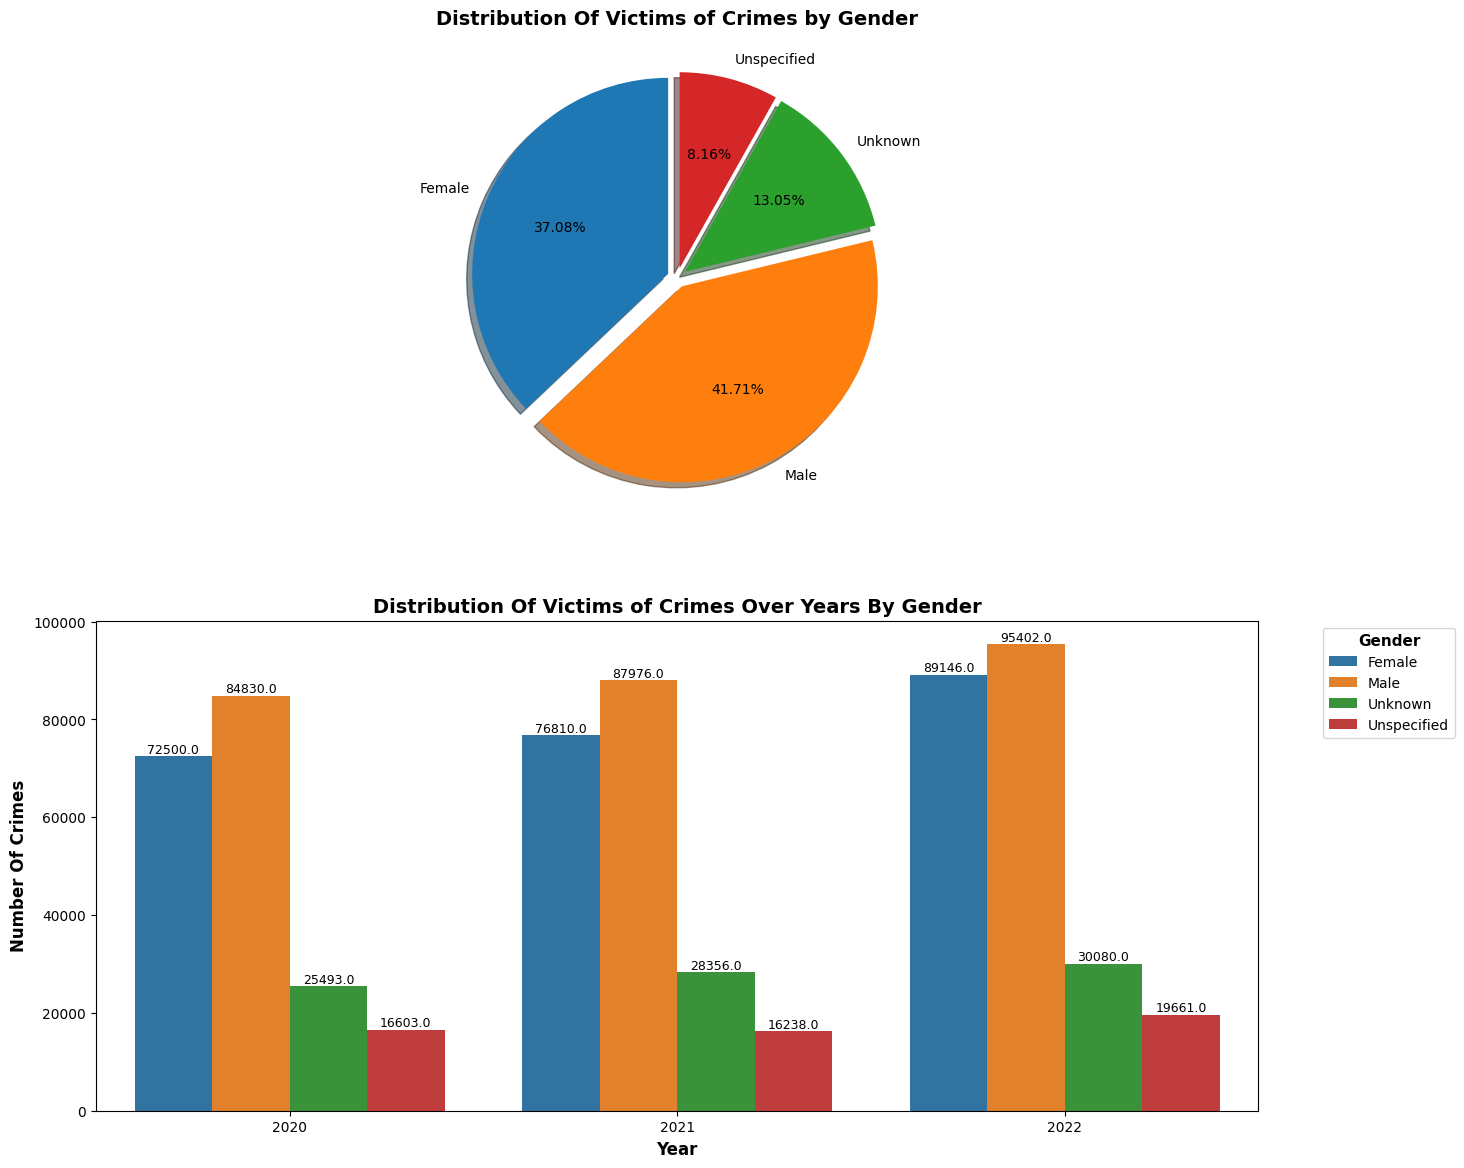

In [40]:
figre, axes= plt.subplots(2, 1, figsize=(15, 14))

# Creating barplot
barplot = sns.barplot(data=yrly_gender_crimes, x="Year OCC", y="Number Of Crimes", hue="Vict Sex", ax=axes[1])
axes[1].set_xlabel("Year", fontweight="bold", fontsize=12)
axes[1].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[1].set_title("Distribution Of Victims of Crimes Over Years By Gender", fontweight="bold", fontsize=14)

legend_obj = axes[1].legend(title="Gender", bbox_to_anchor=(1.05,1), loc="upper left")
title = legend_obj.get_title()
title.set_fontsize(11), title.set_fontweight("bold")

# Setting bar labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom", fontsize=9)

# Pie chart data preparation
labels2 = gender_crimes["Vict Sex"]
sizes2 = gender_crimes["Number Of Crimes"]

# Creating pie chart
explode = [0.05, 0.05, 0.05, 0.05]
axes[0].pie(sizes2, labels=labels2, autopct="%0.2f%%", startangle=90, explode=explode, shadow=True)
axes[0].set_title("Distribution Of Victims of Crimes by Gender", fontweight="bold", fontsize=14)


plt.show()

From the pie chart above, we can conclude that there is about a 41% chance of males being victims of crimes, which is higher than any other gender. Females closely follow with approximately 37%.

The bar plot further illustrates that, in each year, the number of crimes in which men are victims is up to 10,000 higher than those involving women.

What could be the reason for this? We will take a closer look later on.

# Crimes By Neighbourhood

In [41]:
area_crimes = crimes_excl_2023.groupby(["AREA NAME"]).size().reset_index(name="Number Of Crimes")
area_crimes = area_crimes.sort_values(by="Number Of Crimes", ascending=False)

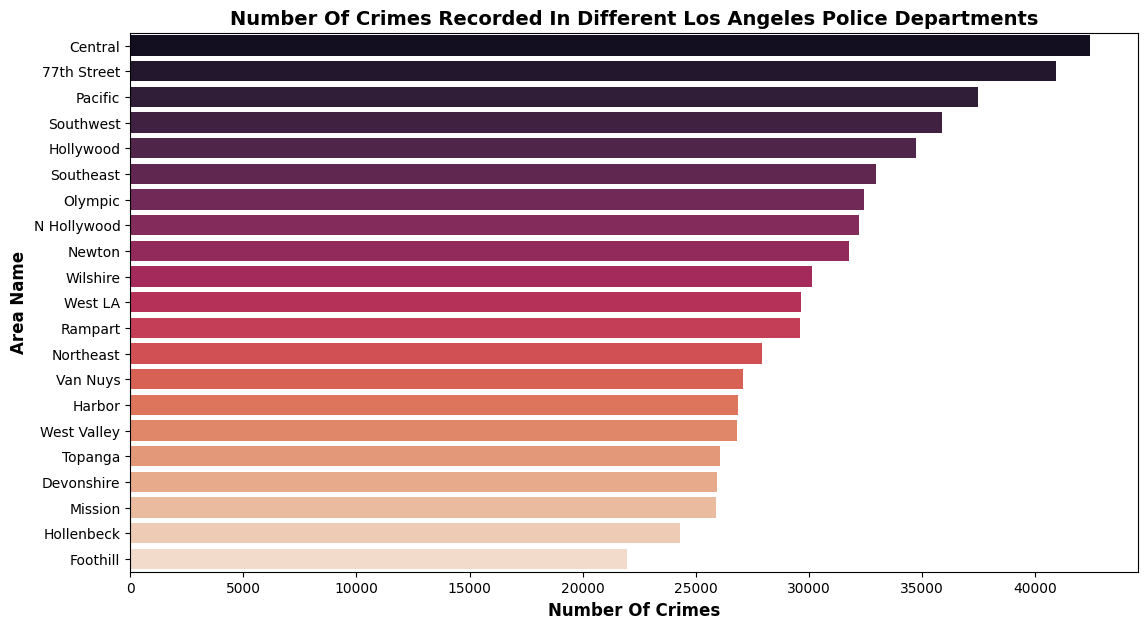

In [42]:
plt.figure(figsize=(13,7))
sns.barplot(data=area_crimes, x="Number Of Crimes", y="AREA NAME", palette="rocket")
plt.xlabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.ylabel("Area Name", fontweight="bold", fontsize=12)
plt.title("Number Of Crimes Recorded In Different Los Angeles Police Departments", fontweight="bold", fontsize=14)

plt.show()

From the bar graph above, we can observe that Central, 77th Street and Pacific are the top 3 Los Angeles Police Divisions that have recorded higher number crimes.

# Top Crimes
## Top 20 Crimes

In [43]:
top_20_crimes = crimes_excl_2023.groupby(["Crm Cd", "Crm Cd Desc"]).size().reset_index(name="Number Of Crimes")
top_20_crimes = top_20_crimes.nlargest(20, "Number Of Crimes")
top_20_crimes

,Crm Cd,Crm Cd Desc,Number Of Crimes
56,510,VEHICLE - STOLEN,69165
61,624,BATTERY - SIMPLE ASSAULT,50573
26,354,THEFT OF IDENTITY,41661
15,330,BURGLARY FROM VEHICLE,40407
79,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",39940
13,310,BURGLARY,39099
6,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",37119
38,440,THEFT PLAIN - PETTY ($950 & UNDER),33379
63,626,INTIMATE PARTNER - SIMPLE ASSAULT,32780
28,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),25695


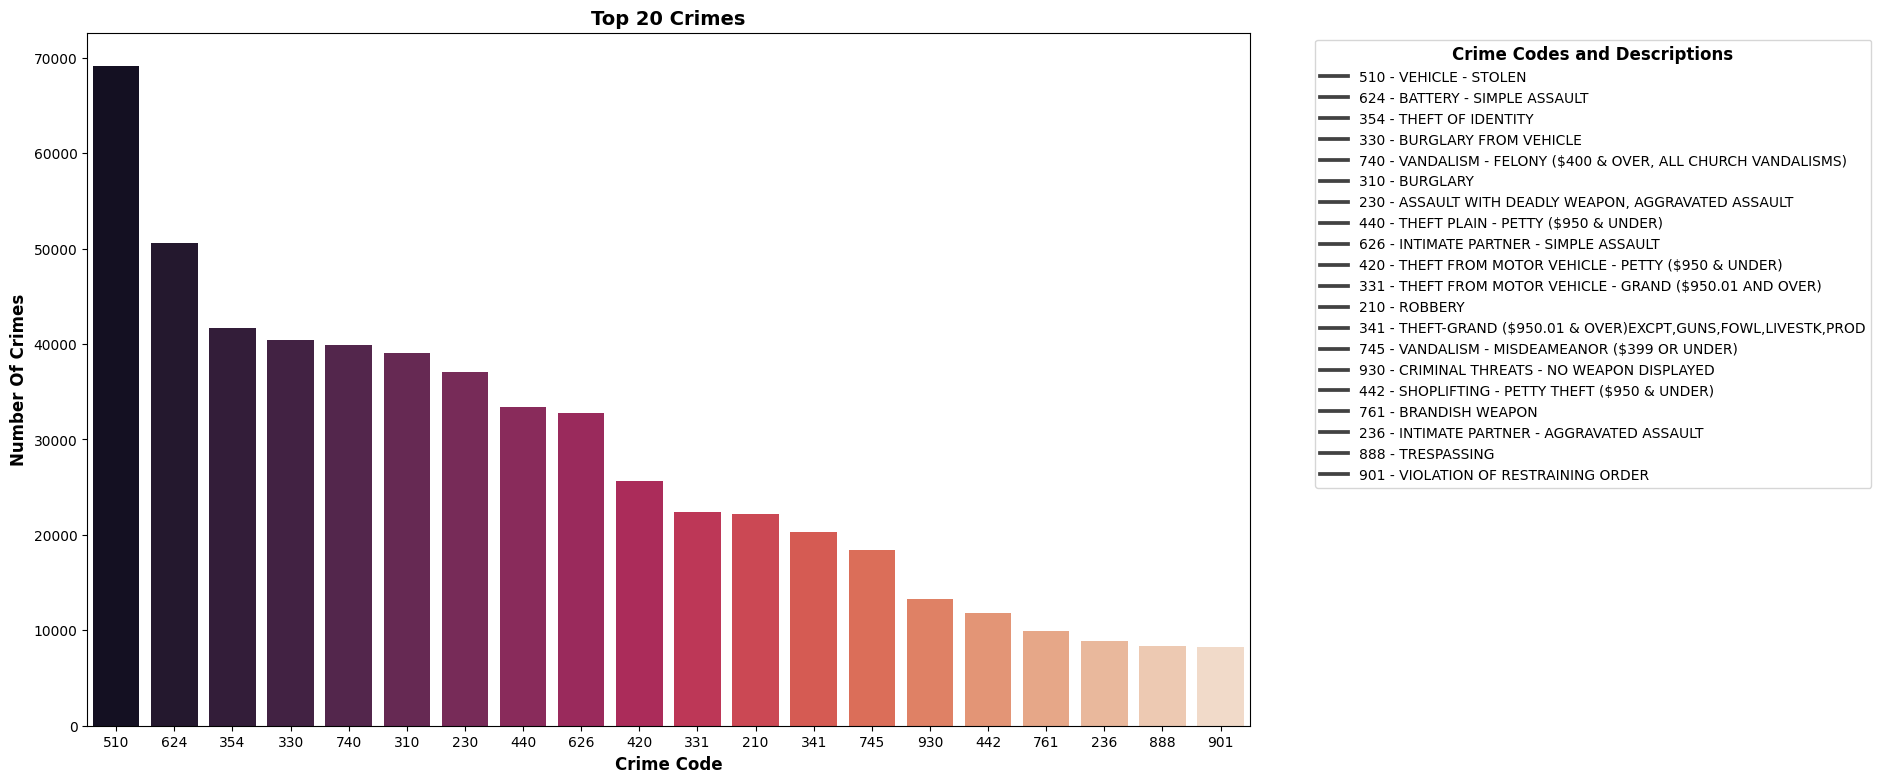

In [44]:
plt.figure(figsize=(15,9))

# Bar plot creation
sns.barplot(data=top_20_crimes, x="Crm Cd", y="Number Of Crimes", palette="rocket",
            order=top_20_crimes.sort_values("Number Of Crimes", ascending=False)["Crm Cd"])
plt.xlabel("Crime Code", fontweight="bold", fontsize=12)
plt.ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.title("Top 20 Crimes", fontweight="bold", fontsize=14)

# Legend creation and tweaking
legend_labels = [f"{code} - {desc}" for code, desc in zip(top_20_crimes["Crm Cd"], top_20_crimes["Crm Cd Desc"])]
legend_obj = plt.legend(legend_labels, title='Crime Codes and Descriptions', bbox_to_anchor=(1.05, 1), loc='upper left')
title = legend_obj.get_title()
title.set_fontsize(12), title.set_fontweight("bold")

plt.show()

In the graph above, we can see that the overall top three crimes in the years 2020 to 2022 are **Vehicle Stolen**, **Battery Simple Assault**, and **Theft of Identity**, with the first one significantly higher than the others.

How have these crimes evolved over each of the three years, and what is their status as of 2023? Let's explore that in the visualization below.

## Top 5 Crimes Over Years

Earlier on, we had noted that the top 3 crimes are **Vehicle Stolen**, **Baterry simple assault** and **Theft Of Identity** . Let us add the other two, **Vandalism Felony** and **Buglary from vehicle**, to the list then see how they have all evolved over years.

In [45]:
top_crimes = [510, 624, 354 ,330, 740]

top_3_crimes = crimes[crimes["Crm Cd"].isin(top_crimes)]
yrly_top_3_crimes = top_3_crimes.groupby(["Year OCC", "Crm Cd Desc"]).size().reset_index(name="Number Of Crimes")
yrly_top_3_crimes = yrly_top_3_crimes.sort_values(by=["Year OCC", "Number Of Crimes"], ascending=[True, False])
yrly_top_3_crimes.head()

,Year OCC,Crm Cd Desc,Number Of Crimes
4,2020,VEHICLE - STOLEN,20768
0,2020,BATTERY - SIMPLE ASSAULT,16329
3,2020,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",12924
1,2020,BURGLARY FROM VEHICLE,12709
2,2020,THEFT OF IDENTITY,8784


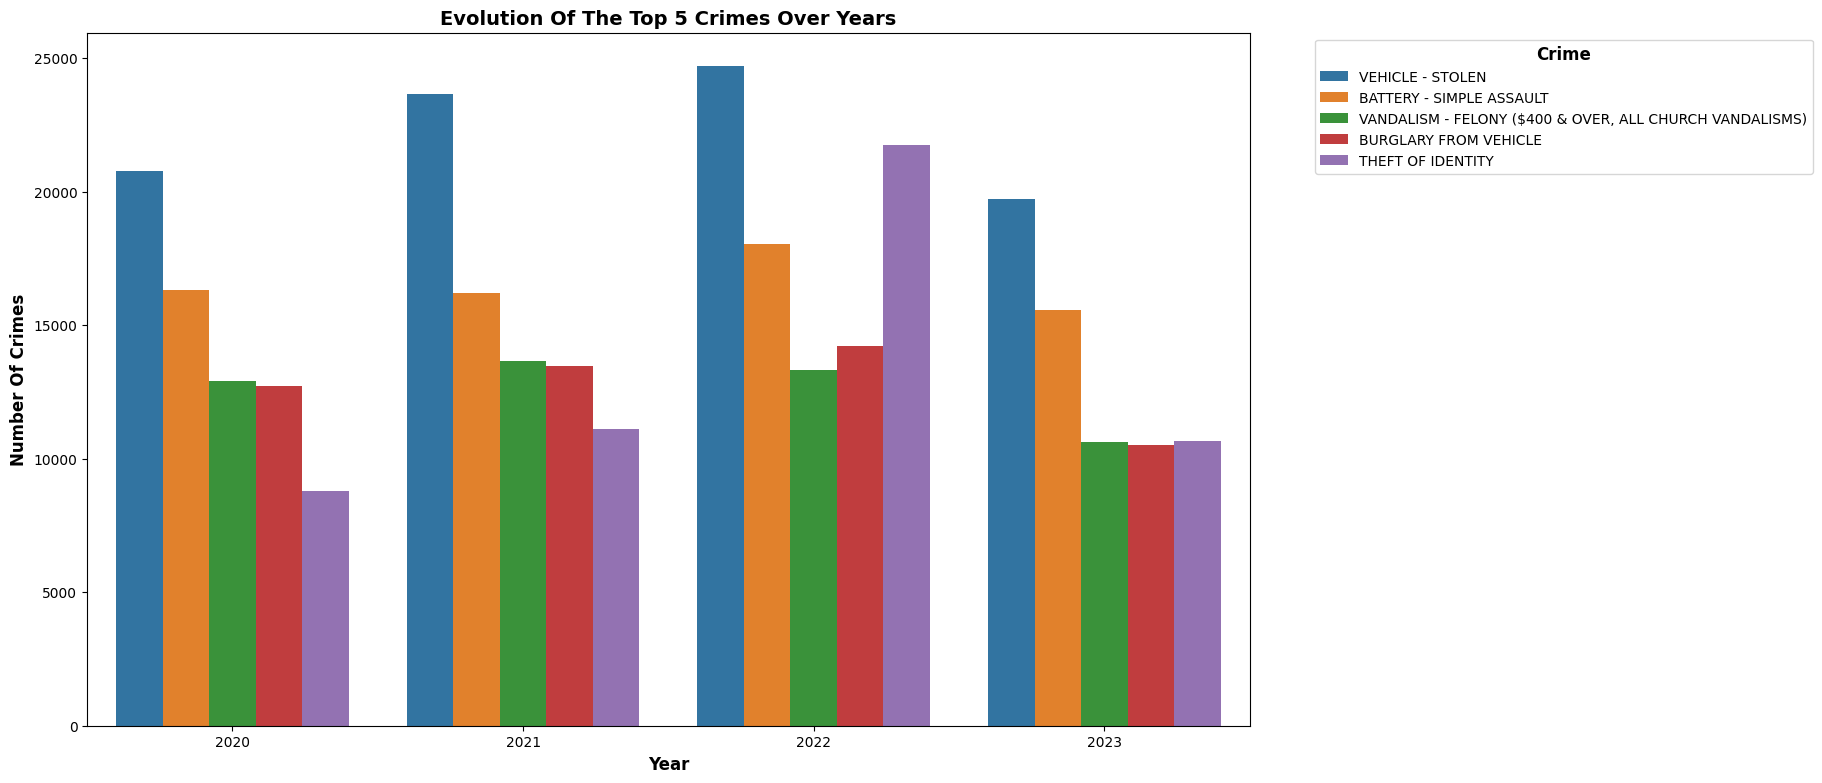

In [46]:
plt.figure(figsize=(15, 9))

# Bar plot creation
sns.barplot(data=yrly_top_3_crimes, x="Year OCC", y="Number Of Crimes", hue="Crm Cd Desc")
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.title("Evolution Of The Top 5 Crimes Over Years", fontweight="bold", fontsize=14)

# Legend creation and tweaking
legend_obj= plt.legend(title="Crime", bbox_to_anchor=(1.05,1), loc="upper left")
title = legend_obj.get_title()
title.set_fontsize(12), title.set_fontweight("bold")

plt.show()

In all of the years, the top five crimes—**Vehicle Stolen**, **Battery Simple Assault**, **Theft of Identity**, **Vandalism Felony**, and **Burglary from Vehicle**—seem to exhibit a pattern, with the first being significantly higher, while the other four closely follow each other. However, in 2022, Theft of Identity saw a notable increase.


## Top 10 Crimes Across Two Main Genders 

In [47]:
crimes_male = crimes_excl_2023[crimes_excl_2023["Vict Sex"] == "Male"]
crimes_female = crimes_excl_2023[crimes_excl_2023["Vict Sex"] == "Female"]

top_10_crimes_male = crimes_male.groupby(["Vict Sex", "Crm Cd", "Crm Cd Desc"]).size().reset_index(name="No Of Crimes")
top_10_crimes_male = top_10_crimes_male.nlargest(10, "No Of Crimes")

top_10_crimes_female = crimes_female.groupby(["Vict Sex", "Crm Cd", "Crm Cd Desc"]).size().reset_index(name="No Of Crimes")
top_10_crimes_female = top_10_crimes_female.nlargest(10, "No Of Crimes")

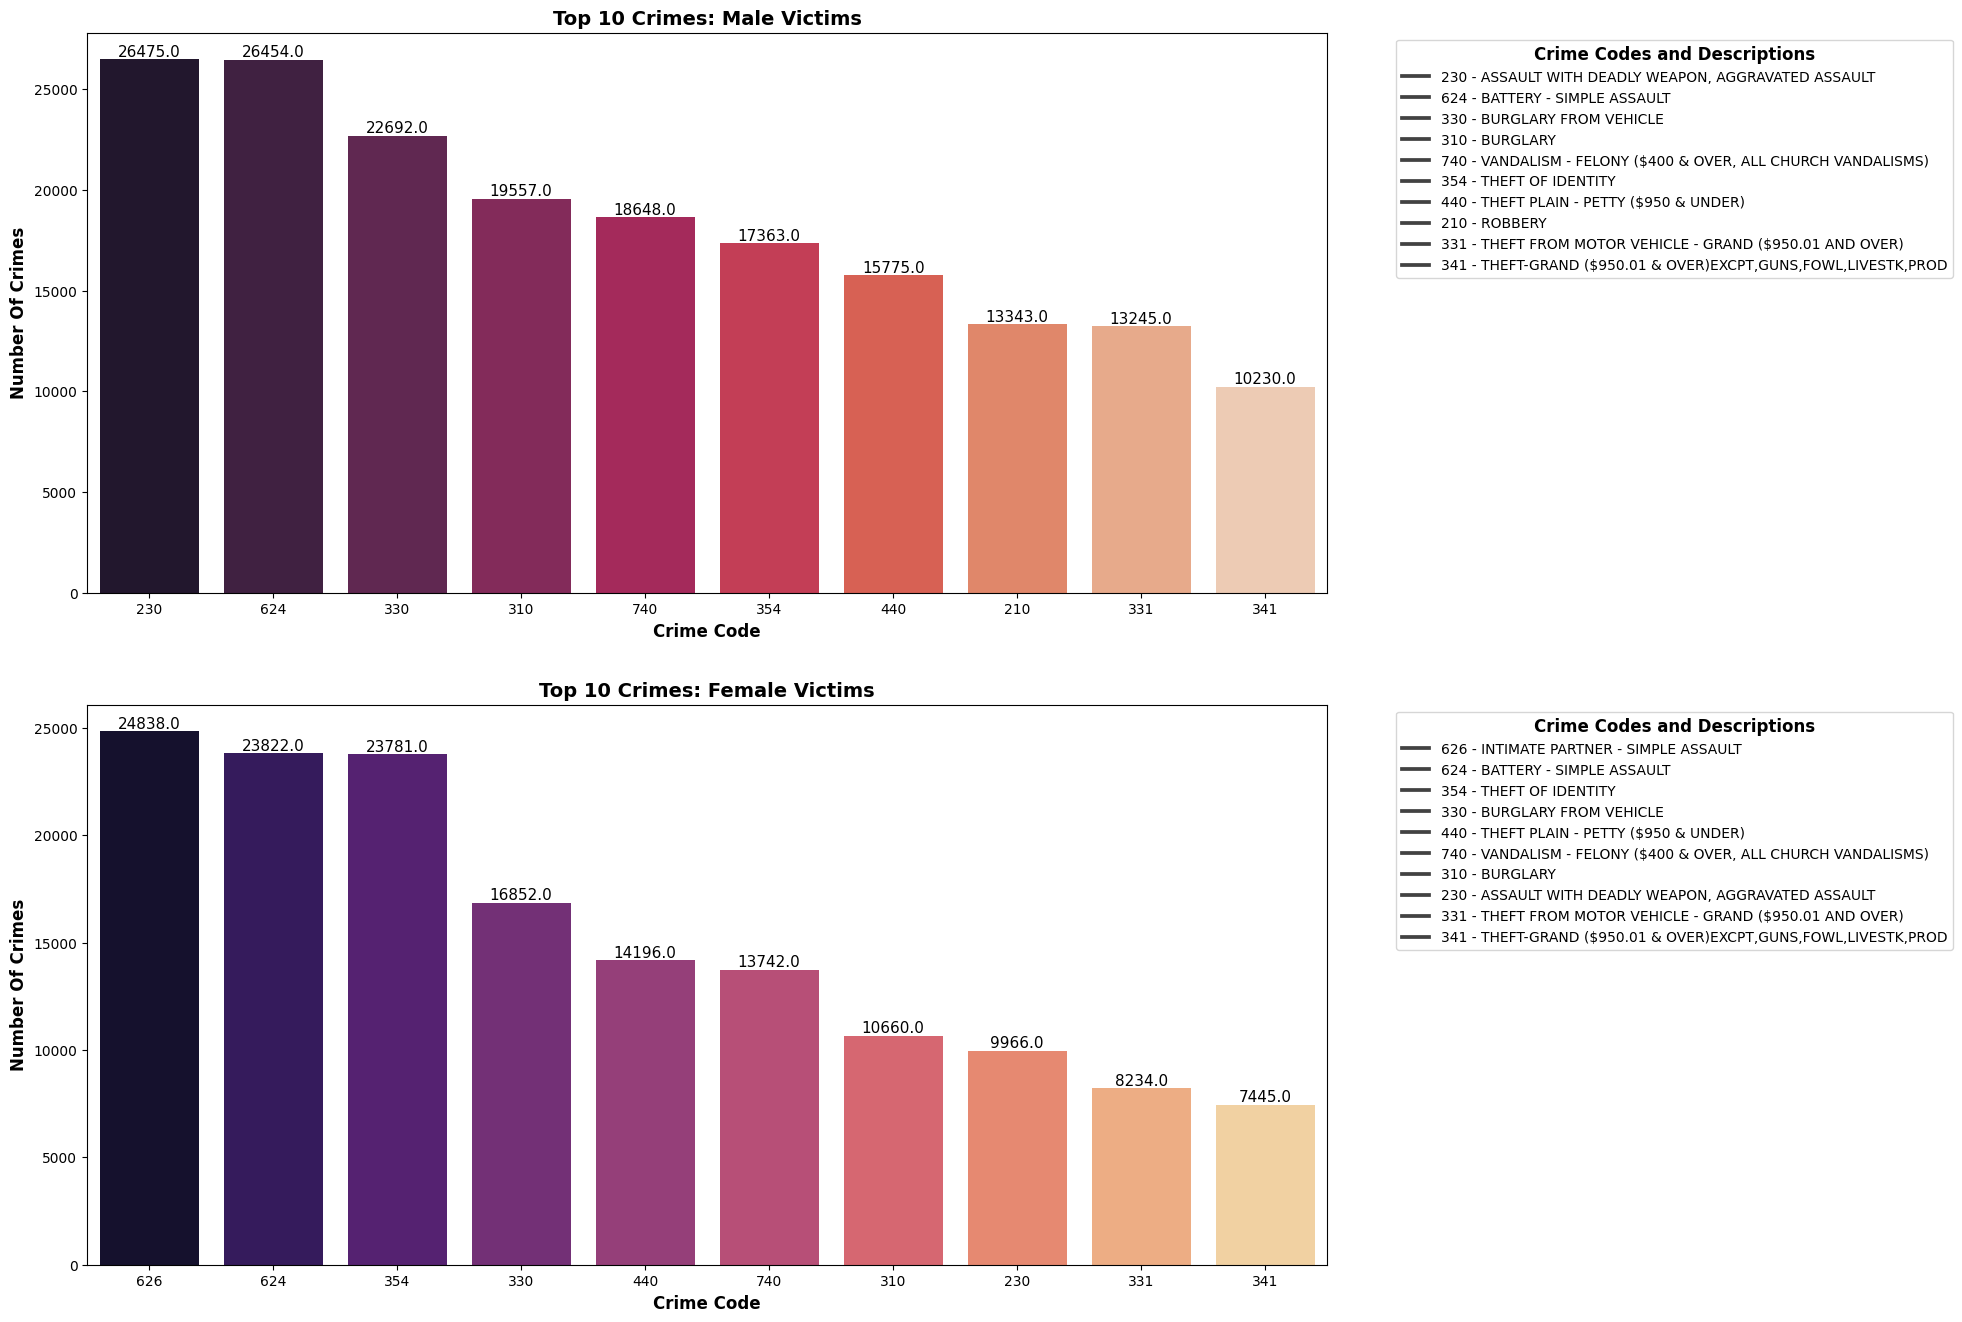

In [48]:
figure, axes=plt.subplots(2, 1, figsize=(16, 16))

# First barplot
barplot = sns.barplot(data=top_10_crimes_male, x="Crm Cd", y="No Of Crimes", ax=axes[0], palette="rocket",
            order=top_10_crimes_male.sort_values(by="No Of Crimes", ascending=False)["Crm Cd"])
axes[0].set_xlabel("Crime Code", fontweight="bold", fontsize=12)
axes[0].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[0].set_title("Top 10 Crimes: Male Victims", fontweight="bold", fontsize=14)

# Setting legend
legend = [f"{code} - {description}" for code, description in zip (top_10_crimes_male["Crm Cd"], top_10_crimes_male["Crm Cd Desc"])]
legend_obj = axes[0].legend(legend, title="Crime Codes and Descriptions", bbox_to_anchor=(1.05, 1), loc="upper left")
title = legend_obj.get_title()
title.set_fontsize(12), title.set_fontweight("bold")


# Setting bar labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom", fontsize=11)

# Second barplot
barplot = sns.barplot(data=top_10_crimes_female, x="Crm Cd", y="No Of Crimes", ax=axes[1], palette="magma",
            order=top_10_crimes_female.sort_values(by="No Of Crimes", ascending=False)["Crm Cd"])
axes[1].set_xlabel("Crime Code", fontweight="bold", fontsize=12)
axes[1].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[1].set_title("Top 10 Crimes: Female Victims", fontweight="bold", fontsize=14)

# Setting legend
legend = [f"{code} - {description}" for code, description in zip (top_10_crimes_female["Crm Cd"], top_10_crimes_female["Crm Cd Desc"])]
legend_obj = axes[1].legend(legend, title="Crime Codes and Descriptions", bbox_to_anchor=(1.05, 1), loc="upper left")
title = legend_obj.get_title()
title.set_fontsize(12), title.set_fontweight("bold")

# Setting bar labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom", fontsize=11)

plt.show()

In the two visualizations above, we can conclude that there are specific crimes target particular genders.

### Assault With Deadly Weapon VS Men
"Assault with a deadly weapon" is a top crime that mostly targets males, with a total of 37,119 reported cases, and 26,475 of them involve male victims. This indicates that approximately 71% of this type of crime is related to men.

Above could be due to various factors, including the nature of the crimes, such as gang-related violence or disputes that escalate to physical altercations. Additionally, men might be more frequently involved in occupations or activities that increase their risk of encountering situations where deadly weapons are used.

### Intimate Partner VS Women
"Crime 626, Intimate Partner," is the number one crime in the female category. There are up to 32,780 reported cases, and in 24,838 of these cases, women are victims, accounting for close to 76%. Interestingly, this crime does not appear anywhere near the top 10 crimes relating to men.

This can be attributed to various factors such as historical power imbalances, societal norms, and cultural influences that contribute to the victimization of women in certain types of relationships. 

# Weapons Used In Crimes
## Top 20 Weapons Used

In [49]:
top_20_weapons = crimes_excl_2023.groupby(["Weapon Used Cd", "Weapon Desc"]).size().reset_index(name="Number Of Crimes")
top_20_weapons = top_20_weapons.nlargest(20, "Number Of Crimes")
top_20_weapons.head()

,Weapon Used Cd,Weapon Desc,Number Of Crimes
61,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",120663
62,500.0,UNKNOWN WEAPON/OTHER WEAPON,23026
73,511.0,VERBAL THREAT,16308
1,102.0,HAND GUN,13869
8,109.0,SEMI-AUTOMATIC PISTOL,5165


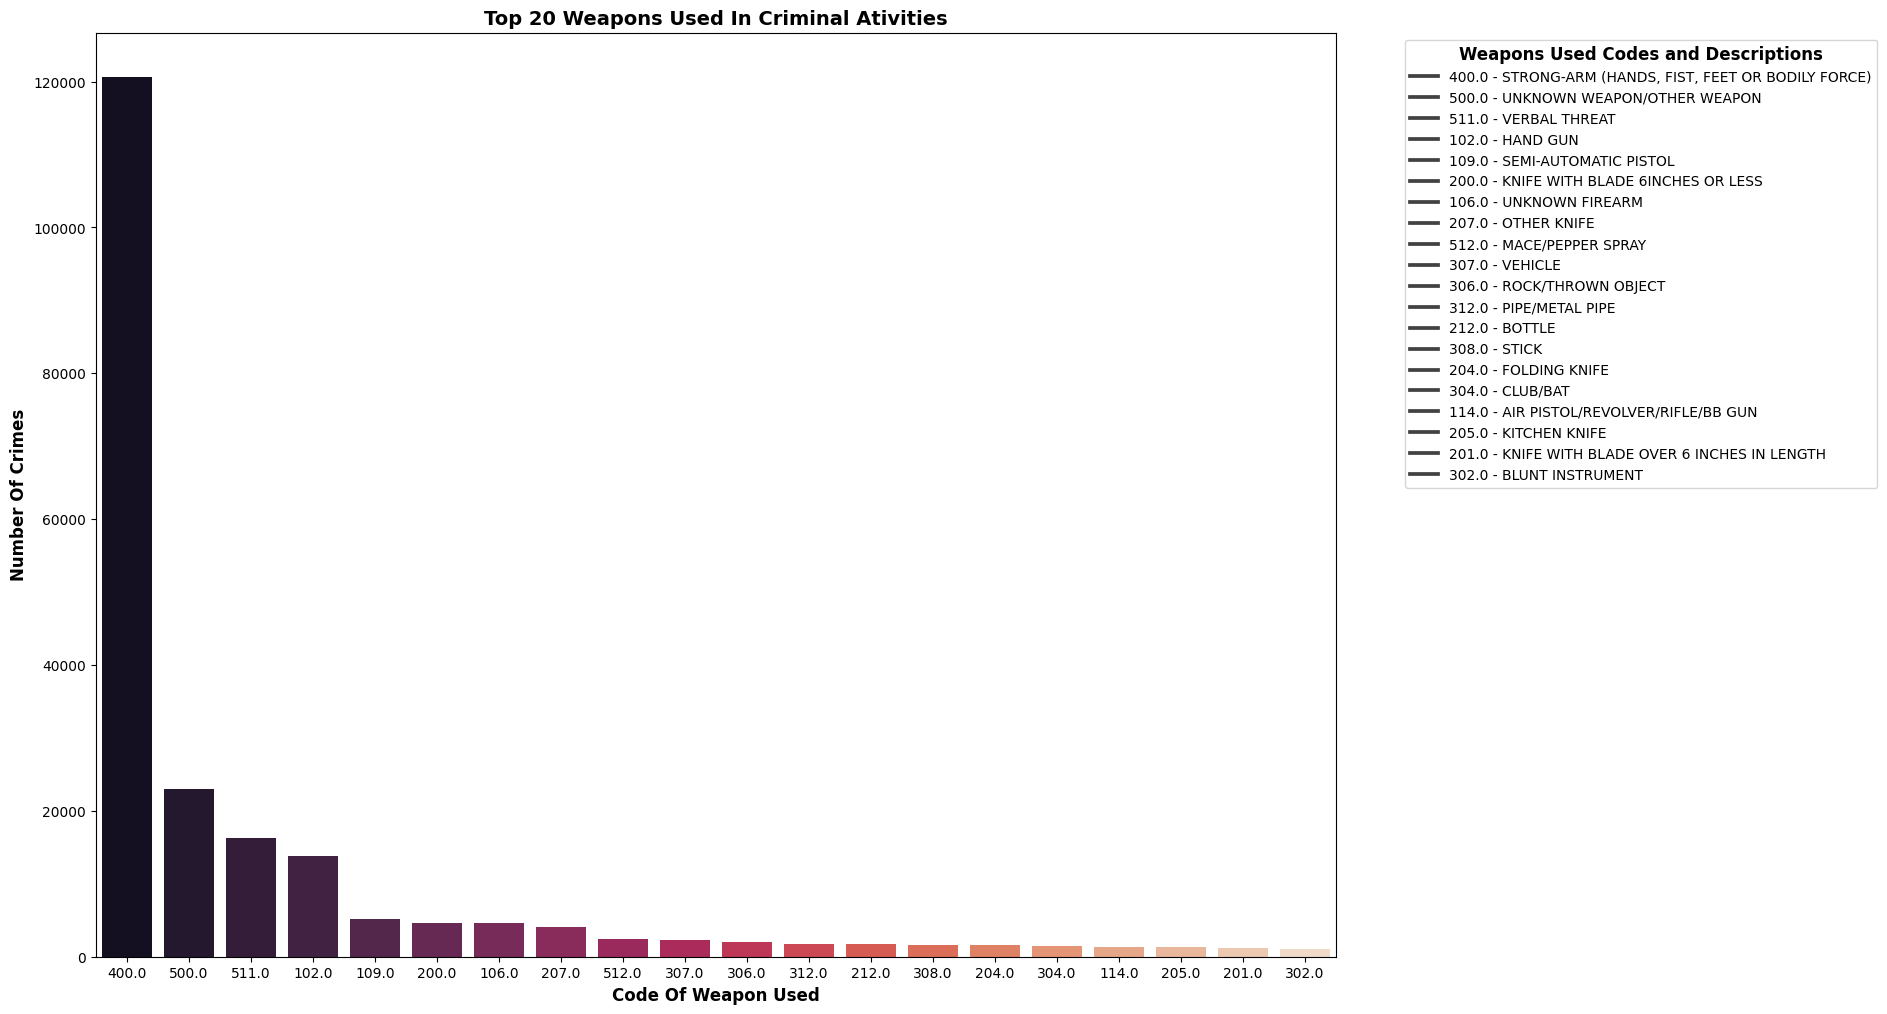

In [50]:
plt.figure(figsize=(16, 12))

# Bar plot generation
sns.barplot(data=top_20_weapons, x="Weapon Used Cd", y="Number Of Crimes", palette="rocket",
            order=top_20_weapons.sort_values(by="Number Of Crimes", ascending=False)["Weapon Used Cd"])
plt.xlabel("Code Of Weapon Used", fontweight="bold", fontsize=12)
plt.ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.title("Top 20 Weapons Used In Criminal Ativities", fontweight="bold", fontsize=14)

# Legend creation and tweaking
legend = [f"{code} - {description}" for code, description in zip (top_20_weapons["Weapon Used Cd"], top_20_weapons["Weapon Desc"])]
legend_obj = plt.legend(legend, title="Weapons Used Codes and Descriptions", bbox_to_anchor=(1.05, 1), loc="upper left")
title = legend_obj.get_title()
title.set_fontsize(12), title.set_fontweight("bold")

plt.show()

## Weapon Categories

In [51]:
weapons_category = crimes_excl_2023[crimes_excl_2023["Weapon Used Category"] != "Null"]

In [52]:
weapons_used = weapons_category.groupby(["Weapon Used Category"]).size().reset_index(name="No Of Crimes")
weapons_used

,Weapon Used Category,No Of Crimes
0,Blunt Object,12779
1,Firearm,28283
2,Other Weapon,43979
3,Sharp Object,18651
4,Strong Arms,120663


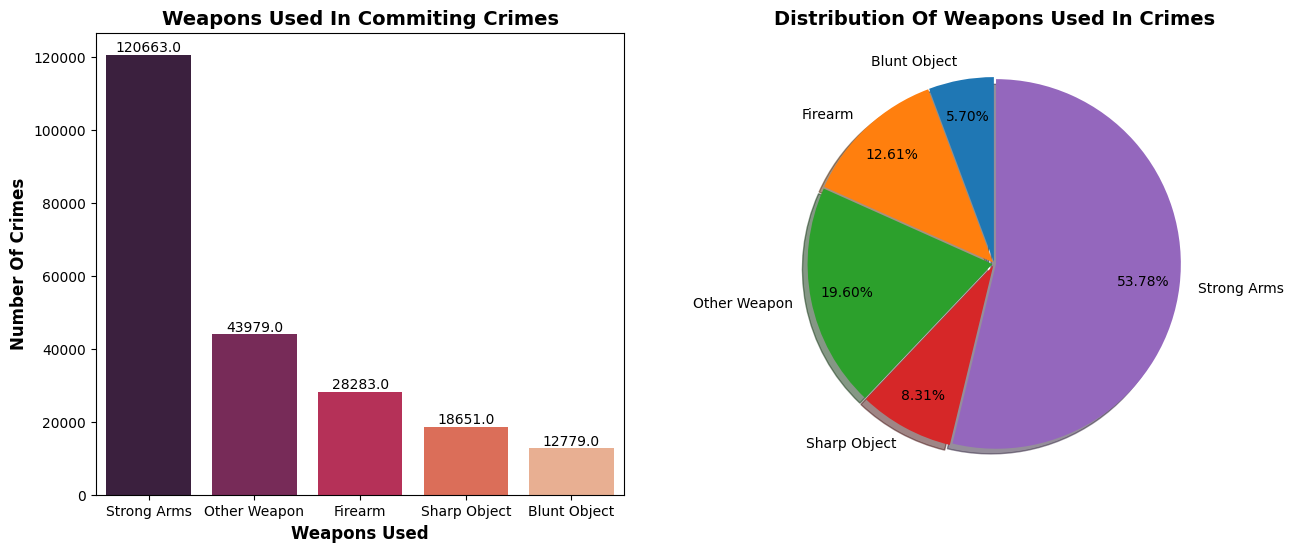

In [53]:

figure, axes=plt.subplots(1, 2, figsize=(15, 6))

# Bar plot creation
barplot = sns.barplot(data=weapons_used, x="Weapon Used Category", y="No Of Crimes", palette="rocket", ax=axes[0],
            order=weapons_used.sort_values(by="No Of Crimes", ascending= False)["Weapon Used Category"])
axes[0].set_xlabel("Weapons Used", fontweight="bold", fontsize=12)
axes[0].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[0].set_title("Weapons Used In Commiting Crimes", fontweight="bold", fontsize=14)

# Bar labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")
    
# Pie chart data preparation
labels3 = weapons_used["Weapon Used Category"]
sizes3 = weapons_used["No Of Crimes"]
explode3 = [0.01, 0.01, 0.01, 0.01, 0.01]

# Pie chart creation
axes[1].pie(sizes3, labels=labels3, autopct="%0.2f%%", explode=explode3, startangle=90, pctdistance=.8, shadow=True)
axes[1].set_title("Distribution Of Weapons Used In Crimes", fontweight="bold", fontsize=14)

plt.show()

## Gender Crimes Versus Weapons Used

In [54]:
gender_weapons = weapons_category.groupby(["Vict Sex", "Weapon Used Category"]).size().reset_index(name="No Of Crimes")
genders = ["Male", "Female"]
gender_weapons = gender_weapons[gender_weapons["Vict Sex"].isin(genders)]
gender_weapons.head()

,Vict Sex,Weapon Used Category,No Of Crimes
0,Female,Blunt Object,4156
1,Female,Firearm,6622
2,Female,Other Weapon,18111
3,Female,Sharp Object,5035
4,Female,Strong Arms,69060


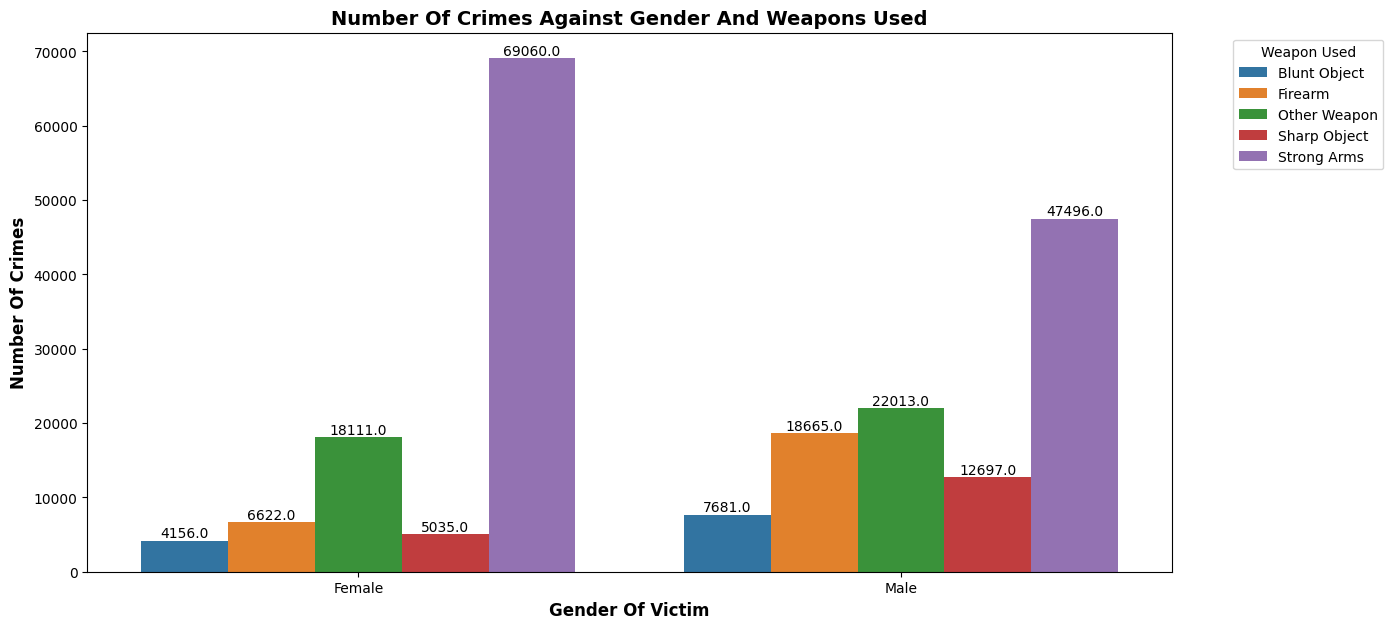

In [55]:
plt.figure(figsize=(14,7))

# Bar plot creation
barplot = sns.barplot(data=gender_weapons, x="Vict Sex", y="No Of Crimes", hue="Weapon Used Category")
plt.xlabel("Gender Of Victim", fontweight="bold", fontsize=12)
plt.ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.title("Number Of Crimes Against Gender And Weapons Used", fontweight="bold", fontsize=14)
plt.legend(title="Weapon Used", bbox_to_anchor=(1.05,1), loc="upper left")

# Bar labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")
    
plt.show()

Firearms and sharp objects are more deadly. In an earlier visualization, **Assault with Deadly Weapon** was more common in males than in females. The current visualization emphasizes the same, with the ratio of male victims to female victims of firearms being 12,697 to 5,035.

When it comes to victims of strong-arm crimes, female victims outnumber male ones significantly, with a ratio of 69,060 to 47,496.

# Premises Crimes Occured
## Top 20 Premises

In [56]:
top_20_premises = crimes_excl_2023.groupby(["Premis Cd", "Premis Desc"]).size().reset_index(name="Number Of Crimes")
top_20_premises = top_20_premises.nlargest(20, "Number Of Crimes")
top_20_premises.head()

,Premis Cd,Premis Desc,Number Of Crimes
0,101.0,STREET,161711
128,501.0,SINGLE FAMILY DWELLING,109522
129,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",78661
7,108.0,PARKING LOT,46313
54,203.0,OTHER BUSINESS,29528


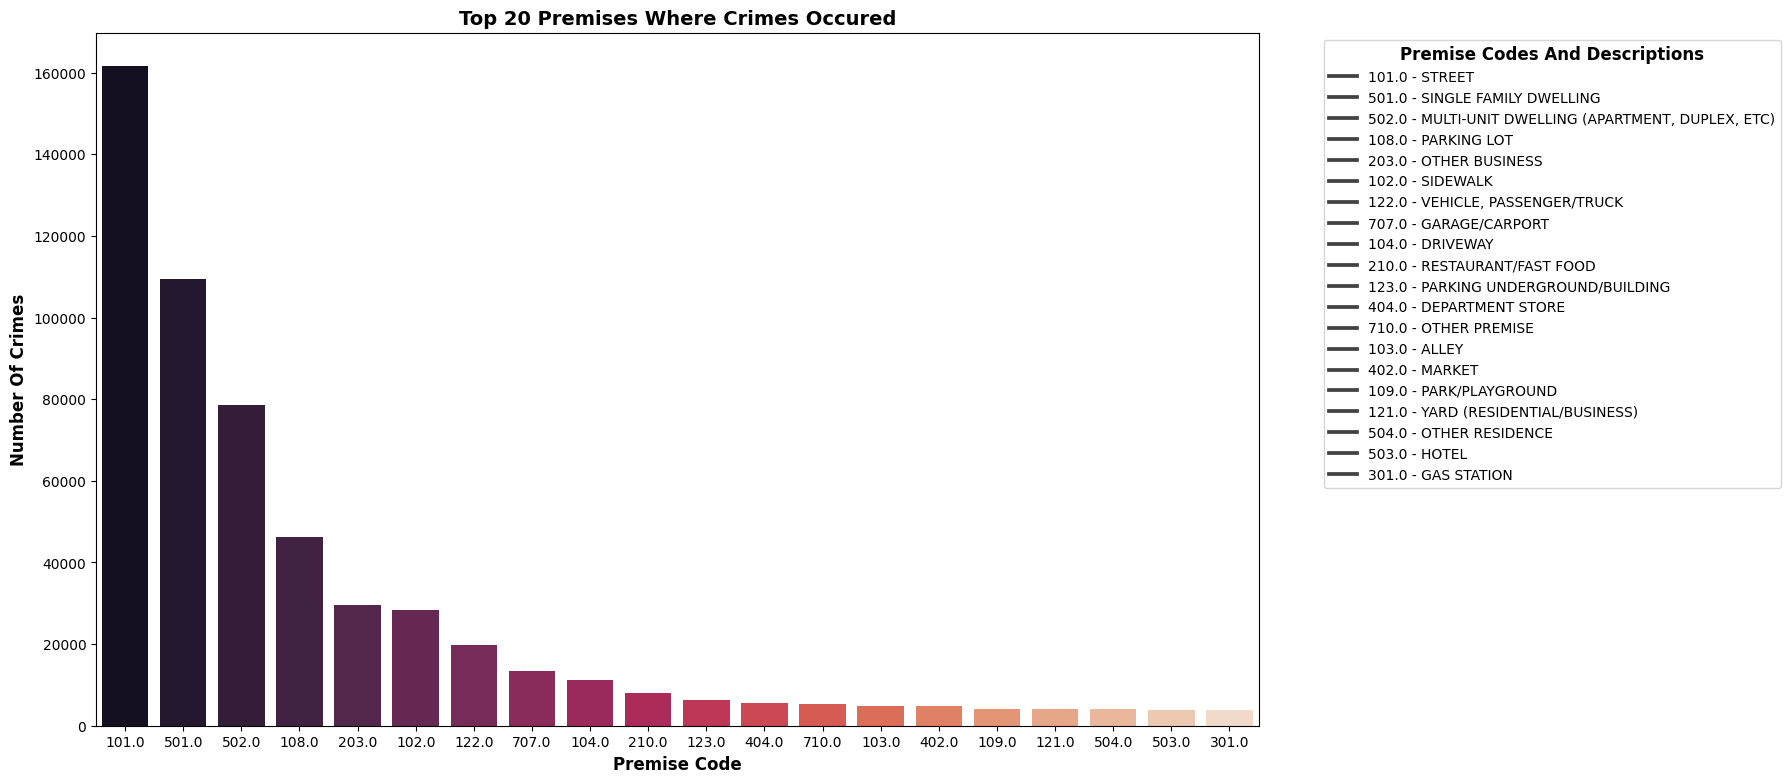

In [57]:
plt.figure(figsize=(15,9))

# Bar plot creation
sns.barplot(data=top_20_premises, x="Premis Cd", y="Number Of Crimes", palette="rocket",
           order=top_20_premises.sort_values(by="Number Of Crimes", ascending=False)["Premis Cd"])
plt.xlabel("Premise Code", fontweight="bold", fontsize=12)
plt.ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
plt.title("Top 20 Premises Where Crimes Occured", fontweight="bold", fontsize=14)

# Legend creation and tweaking
legend = [f"{code} - {description}" for code, description in zip (top_20_premises["Premis Cd"], top_20_premises["Premis Desc"])]
legend_obj = plt.legend(legend, title="Premise Codes And Descriptions", bbox_to_anchor=(1.05,1), loc="upper left")
title = legend_obj.get_title()
title.set_fontsize(12), title.set_fontweight("bold")

plt.show()

# Crimes Versus Their Statuses

In [58]:
crimes_status = crimes_excl_2023.groupby("Status Desc").size().reset_index(name="Number Of Crimes")
crimes_status = crimes_status.sort_values(by="Number Of Crimes", ascending=False)
crimes_status = crimes_status[crimes_status["Status Desc"] != "UNK"]

yrly_crimes_status = crimes_excl_2023.groupby(["Year OCC", "Status Desc"]).size().reset_index(name="Number Of Crimes")
yrly_crimes_status = yrly_crimes_status.sort_values(by="Number Of Crimes", ascending=False)
yrly_crimes_status = yrly_crimes_status[yrly_crimes_status["Status Desc"] != "UNK"]

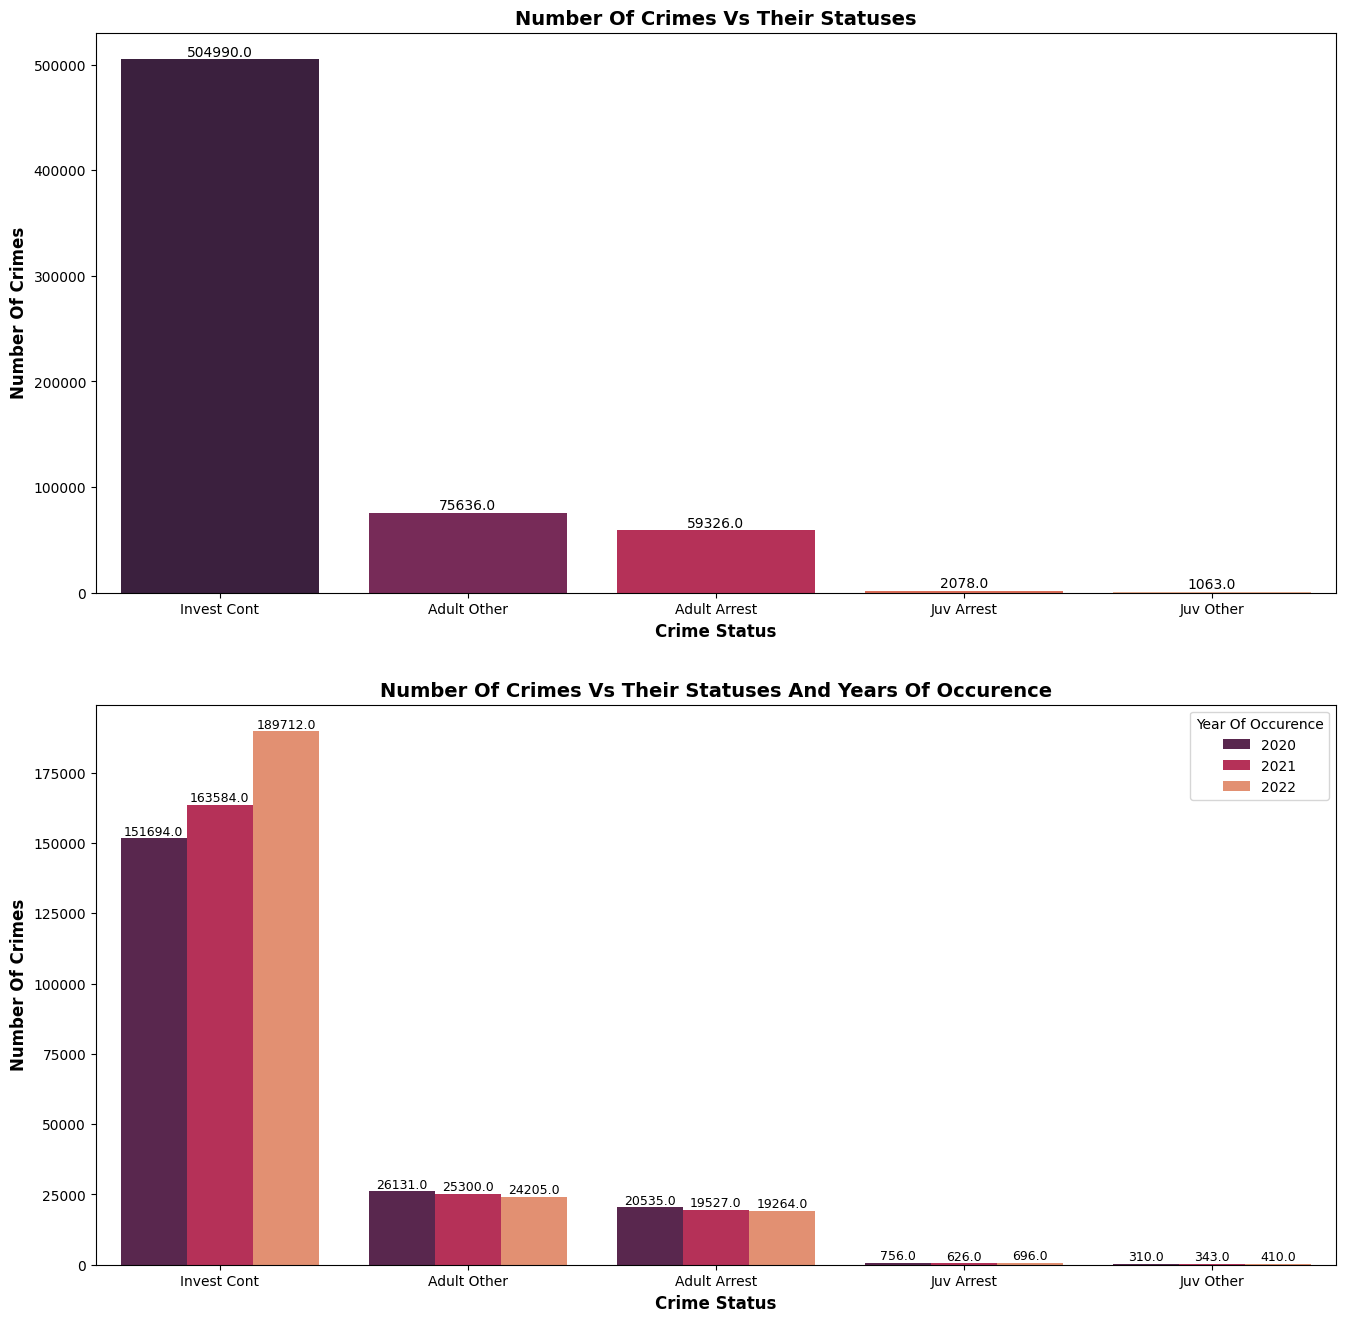

In [59]:
figure, axes=plt.subplots(2, 1, figsize=(16, 16))

# First bar plot creation
barplot=sns.barplot(data=crimes_status, x="Status Desc", y="Number Of Crimes", palette="rocket", ax=axes[0])
axes[0].set_xlabel("Crime Status", fontweight="bold", fontsize=12)
axes[0].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[0].set_title("Number Of Crimes Vs Their Statuses", fontweight="bold", fontsize=14)

# Bar labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/ 2, p.get_height()), ha="center", va="bottom")
    
# Second bar plot creation
barplot=sns.barplot(data=yrly_crimes_status, x="Status Desc", y="Number Of Crimes", palette="rocket", hue="Year OCC", ax=axes[1])
axes[1].set_xlabel("Crime Status", fontweight="bold", fontsize=12)
axes[1].set_ylabel("Number Of Crimes", fontweight="bold", fontsize=12)
axes[1].set_title("Number Of Crimes Vs Their Statuses And Years Of Occurence", fontweight="bold", fontsize=14)
axes[1].legend(title="Year Of Occurence")

# Bar labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/ 2, p.get_height()), ha="center", va="bottom", fontsize=9)
    
plt.show()

In the first visualization above, we can conclude that crimes with ongoing investigations are significantly higher than any other category, including Adult Other, Adult Arrest, Juvenile Arrest, and Juvenile Other.

Regarding the relationship between crime status and the year of occurrence, the number of crimes under ongoing investigation tends to rise over the years. In contrast, the other four categories show a slight decrease from one year to the next.
